In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
import os
import numpy
import cv2

In [12]:
!nvidia-smi


Tue Nov  7 14:25:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P8     2W /  N/A |     39MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
print(tf.__version__)

2.10.0


In [14]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13539749812724134242
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2252026676
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17399417915358278853
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [15]:
path = r"C:\Users\ibrah\Downloads\Compressed\archive\plantvillage dataset\segmented"
# load the images from the directory and set the label into the folder name 
train_ds , test_ds = keras.utils.image_dataset_from_directory(path,image_size=(256,256),batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both')

Found 54306 files belonging to 38 classes.
Using 43445 files for training.
Using 10861 files for validation.


In [16]:
# get the classes names 
classes = train_ds.class_names

In [8]:
def model():
    model = keras.Sequential([
        keras.layers.Rescaling(scale=1/255,input_shape = (256,256,3)),
        keras.layers.Conv2D(60,(3,3),strides=(1,1),padding='same',activation='relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(30,(3,3),strides=(1,1),padding='same',activation='relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(10,(3,3),strides=(1,1),padding='same',activation='relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(38,activation='softmax')]
    
    )
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model

In [9]:
model = model()

In [9]:
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("No GPU is available")

GPU is available


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 60)      1680      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 60)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 30)      16230     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 30)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 10)        2

In [12]:
print(tf.device('/GPU:0'))

In [13]:
with tf.device('/GPU:1'):
    # Create and compile your model
   
    # Train your model
    model.fit(train_ds,epochs=10)


Epoch 1/10
1358/1358 [==============================] - 222s 156ms/step - loss: 1.3091 - accuracy: 0.6203
Epoch 2/10
1358/1358 [==============================] - 210s 155ms/step - loss: 0.5466 - accuracy: 0.8283
Epoch 3/10
1358/1358 [==============================] - 208s 153ms/step - loss: 0.3259 - accuracy: 0.8937
Epoch 4/10
1358/1358 [==============================] - 207s 152ms/step - loss: 0.2125 - accuracy: 0.9293
Epoch 5/10
1358/1358 [==============================] - 205s 151ms/step - loss: 0.1558 - accuracy: 0.9473
Epoch 6/10
1358/1358 [==============================] - 207s 152ms/step - loss: 0.1181 - accuracy: 0.9602
Epoch 7/10
1358/1358 [==============================] - 207s 152ms/step - loss: 0.0934 - accuracy: 0.9695
Epoch 8/10
1358/1358 [==============================] - 207s 152ms/step - loss: 0.0889 - accuracy: 0.9723
Epoch 9/10
1358/1358 [==============================] - 207s 152ms/step - loss: 0.0758 - accuracy: 0.9760
Epoch 10/10
1358/1358 [=======================

In [14]:
model.evaluate(test_ds)

340/340 [==============================] - 20s 57ms/step - loss: 0.9654 - accuracy: 0.8423


[0.9653867483139038, 0.8422797322273254]

In [15]:
keras.models.save_model(model,"plan.h5")

In [18]:
model = keras.models.load_model('plan.h5')

In [11]:
model.evaluate(test_ds)

340/340 [==============================] - 29s 46ms/step - loss: 0.9654 - accuracy: 0.8423


[0.9653868079185486, 0.8422797322273254]

1/1 [==============================] - 0s 25ms/step


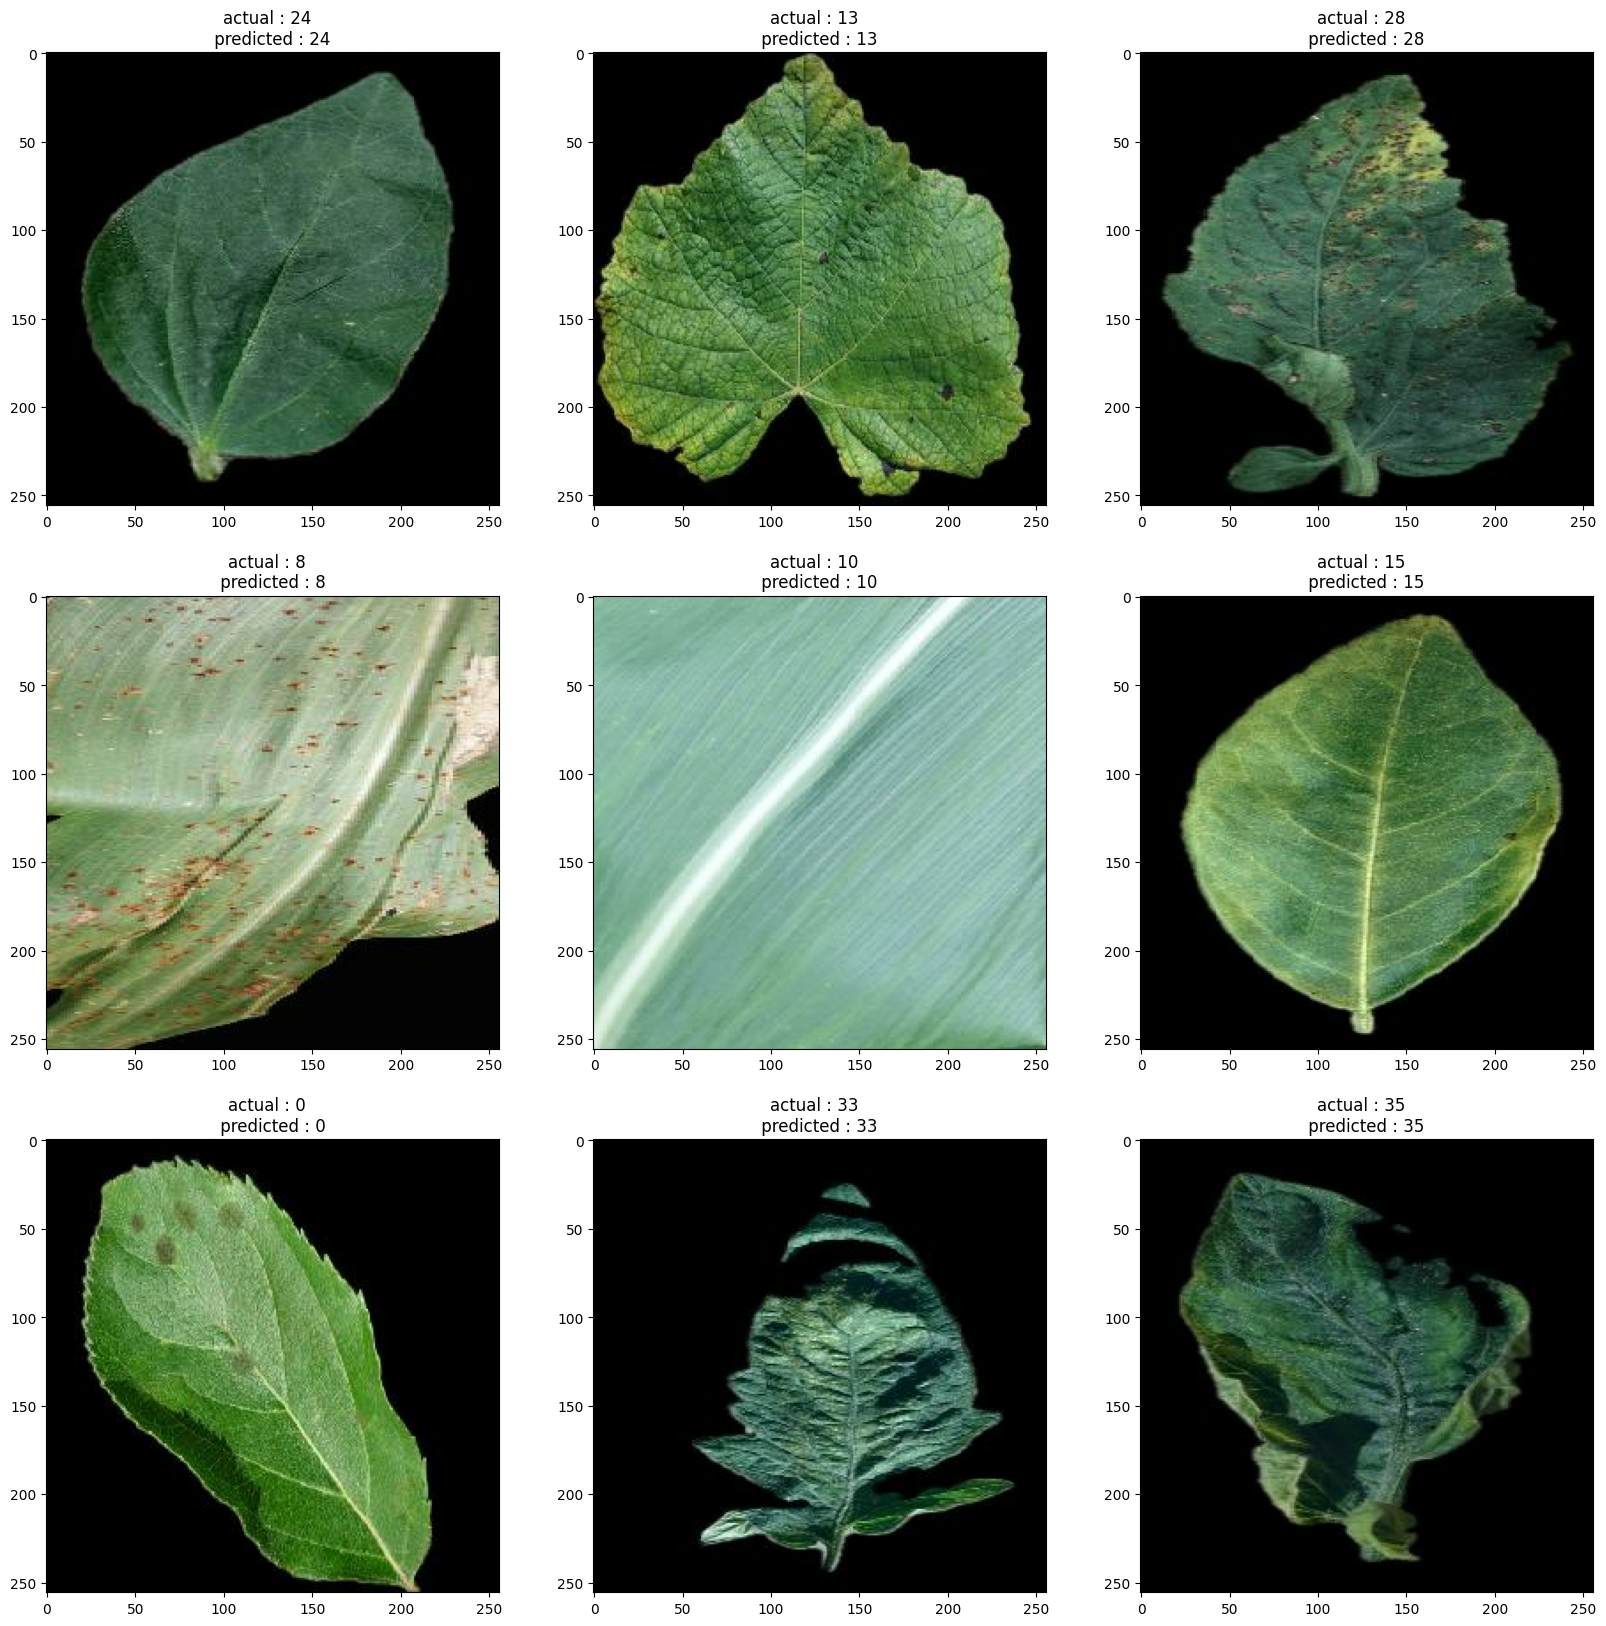

In [16]:
plt.figure(figsize=(20,20))

for image,lable in test_ds.take(1):
    for i in range(1,10):
        plt.subplot(3,3,i)
        plt.imshow(image[i].numpy().astype('uint32'))
        img=image[i]
        img = img.numpy()
        img = tf.expand_dims(img,0)
        image_label = lable[i]
        predicted_lable = numpy.argmax(model.predict(img))
        plt.title(f"actual : {image_label}  \n predicted : {predicted_lable} ")


1/1 [==============================] - 0s 18ms/step


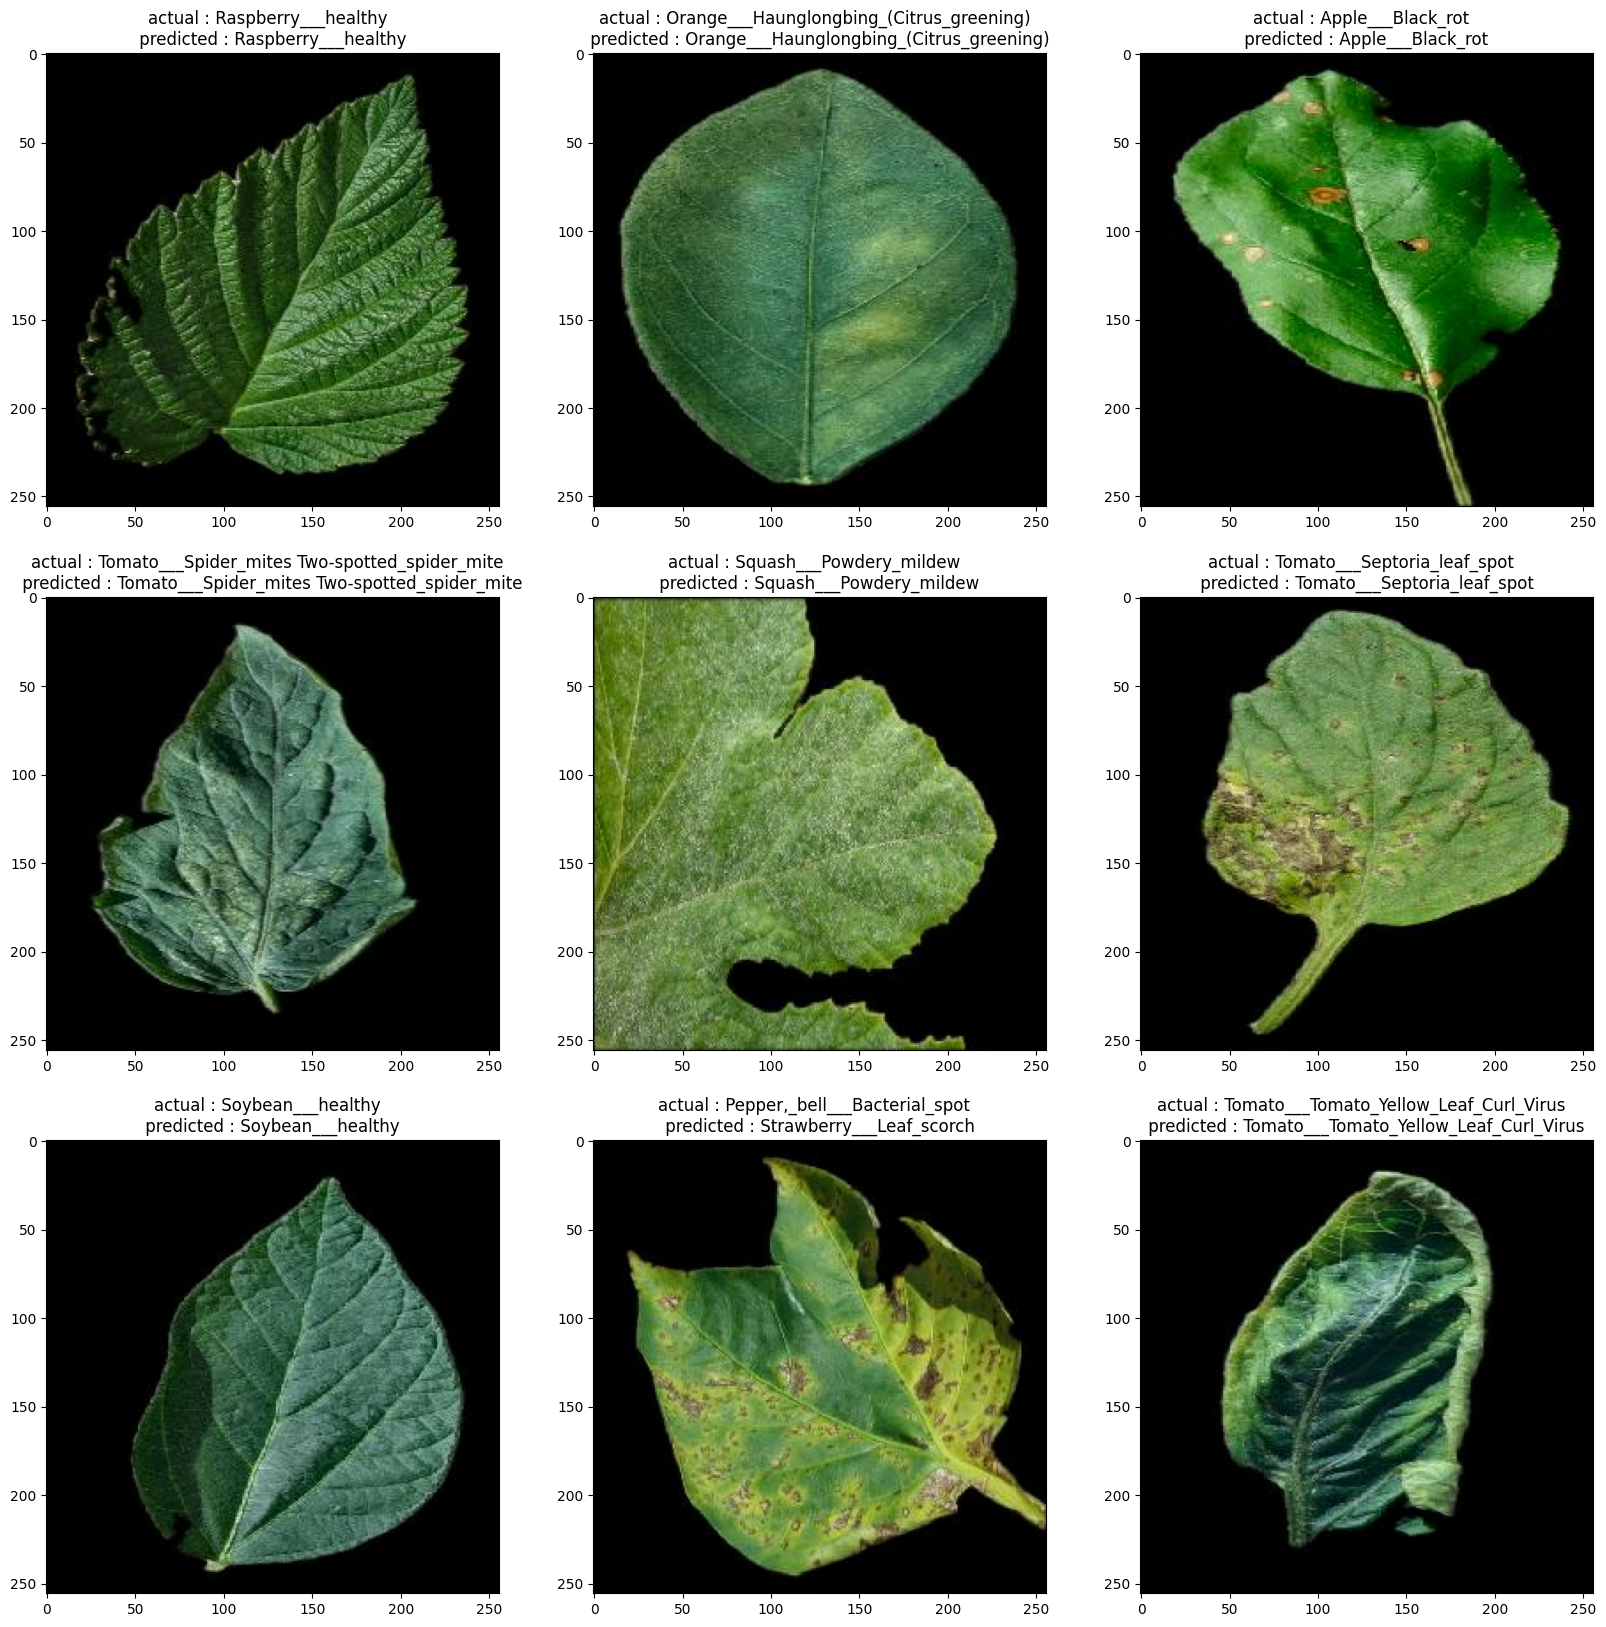

In [18]:
plt.figure(figsize=(20,20))

for image,lable in test_ds.take(2):
    for i in range(1,10):
        plt.subplot(3,3,i)
        plt.imshow(image[i].numpy().astype('uint32'))
        img=image[i]
        img = img.numpy()
        img = tf.expand_dims(img,0)
        image_label = classes[lable[i]]
        predicted_lable =classes[numpy.argmax(model.predict(img))]
        plt.title(f"actual : {image_label}  \n predicted : {predicted_lable} ")


In [21]:
def loadImg(img_path):
    img = cv2.imread(img_path)
    #img = img.numpy().astype("uint32")
    img = tf.expand_dims(img,0)
    prediction = classes[numpy.argmax(model.predict(img))]
    return prediction

In [24]:
imgpath = r"C:\Users\ibrah\Downloads\Compressed\archive\plantvillage dataset\segmented\Tomato___healthy\000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1_final_masked.jpg"
prediction = loadImg(imgpath)

1/1 [==============================] - 0s 163ms/step
